<a href="https://colab.research.google.com/github/Essi-Narim/Credit-Default-Prediction/blob/main/credit_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#magic command to display matplotlib plots inline
%matplotlib inline 

# **1. Data Anlysis**

In [212]:
# Load csv files into pandas dataframes
df = pd.read_csv("./lending_club_loan_two.csv")
meta_data = pd.read_csv("./lending_club_info.csv")


In [213]:
# check meta-data
meta_data
meta_data["Description"][12] #check description of loan_status

'Current status of the loan'

In [214]:
df.shape; df.head()
df.info(); df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## 1.2 Investigate Target Variable (loan_status)
seaborn.**countplot()** is similar to a bar chart, but it is specifically designed for plotting the count of categorical data. It is used to show the number of occurrences of **each category** in a dataset. In contrast, a **bar chart** is a general type of chart that can be used to compare the values of **different categories** or groups. A bar chart can display any type of data, including categorical and numerical data.

So, while seaborn.countplot() can be considered a type of bar chart, it is specifically designed for a certain type of data and use case.

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

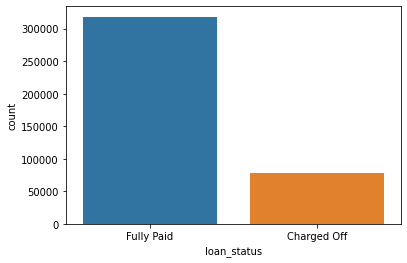

In [215]:
# As loan_status is a categorical variable, we must use a bar chart
sns.countplot(x="loan_status", data=df)
df["loan_status"].value_counts()*(100/len(df)) #show loan_status value_counts in %

Attention: our **targer variable** is **highly-imbalanced**, thus the model will be *biased* towards Fully Paid!

## 1.3 Investigate load_amnt

<Axes: xlabel='loan_amnt', ylabel='Count'>

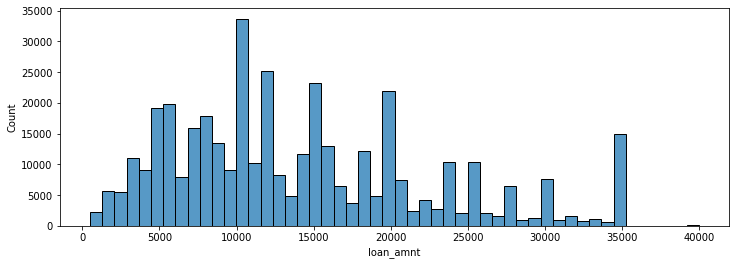

In [216]:
# As loan_amount is a numerical variable, we must use a histogram
plt.figure(figsize= (12, 4)) # define the figure size
sns.histplot(df["loan_amnt"], bins=50)

load_amnt is **positively-skewed**! 40k laon_amt is clearly an **outlier**! 

## 1.4 Investigate the **Correlation Matrix** (only numerical varaibles!)

<Axes: >

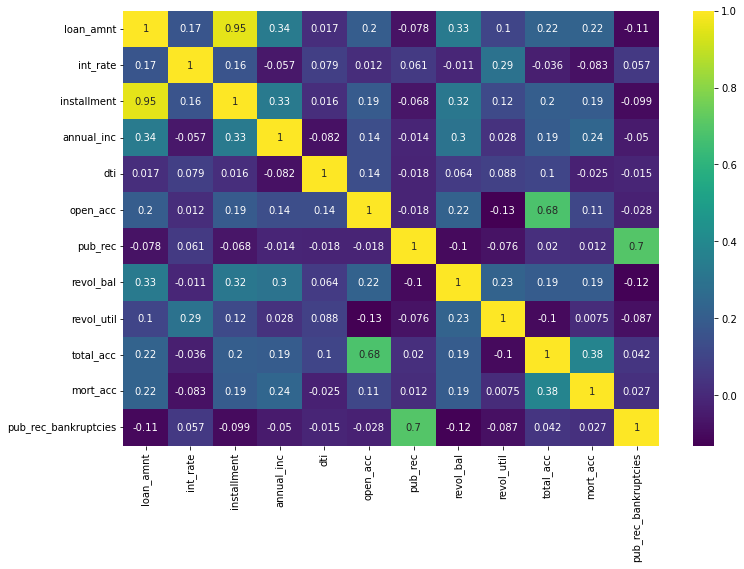

In [217]:
# Heatmap of Correlation Matrix
plt.figure(figsize= (12, 8)) # define the figure size
sns.heatmap(df.corr(), annot=True, cmap="viridis")

1. very strong correlation between instalment and loan_amnt
2. strong correlations between total_acc and open_acc; pub_rec_bankruptcies and pub_rec

We further investigate the relationship between instalment and loan_amnt via ***scatterplot***.

<Axes: xlabel='installment', ylabel='loan_amnt'>

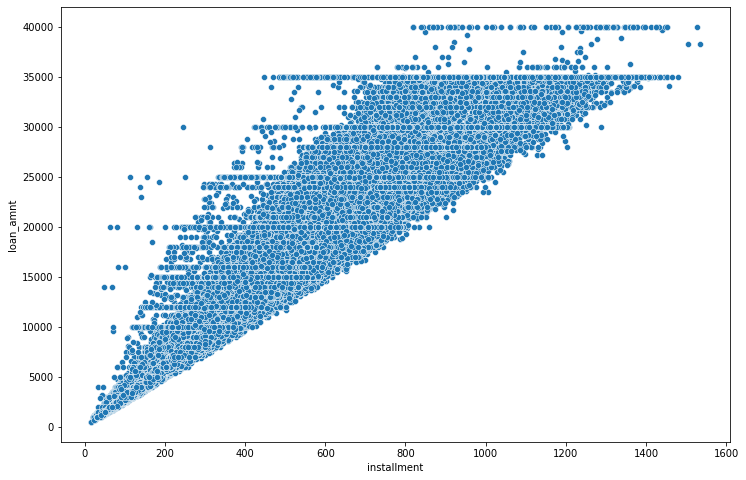

In [218]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="installment", y="loan_amnt", data=df) # scatterplot of instalment and loan_amnt

It shows that the loan_amnt varies with the size of installments in accordance with the period of repayment!

## 1.5 Investigate relationship between **target varaible** (loan_status, categorical) and laon_amnt (numerical variable)

**Box plot**, also known as a **box-and-whisker** plot, is a graphical representation of the distribution of numerical data based on five summary statistics: **minimum, first quartile, median, third quartile, and maximum**. The box in the plot represents the **interquartile range (IQR)**, which is the distance between the first and third quartile of the data, and the **whiskers** represent the range of the data **beyond the IQR**. The line inside the box represents the **median** value of the data.

They are especially useful for comparing data from **different groups or categories**. Box plots can also be used to visualize the spread of data, as well as to identify any skewness or asymmetry in the data distribution.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

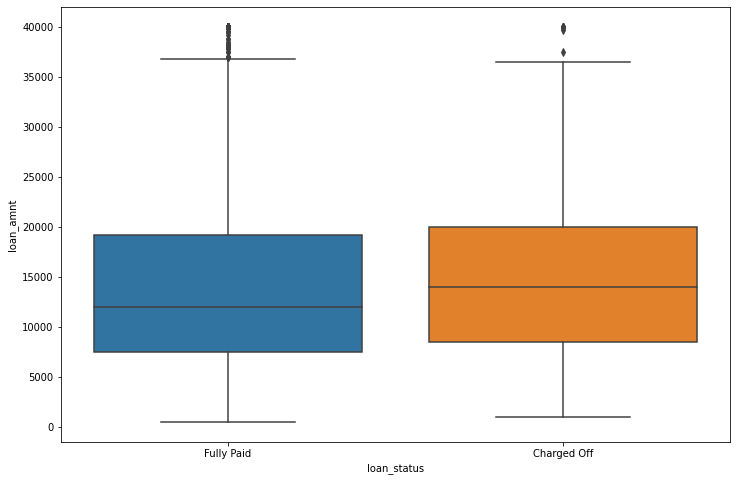

In [219]:
plt.figure(figsize=(12,8))
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

Assumption: since the **median** of loan_amnt in both paid and unpaid loan_status are quite *similar*, loan_amnt is *not a good factor* for investigating the trget variable!!

To investigate this assumption further, we directly look into the statistics between these two variable:

In [220]:
df.groupby("loan_status")["loan_amnt"].describe() # We extract the stat data of above box-plot 

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


## 1.5 Investigate relationship between **target varaible** (loan_status, categorical) and grade (categorical variable)

<Axes: xlabel='grade', ylabel='count'>

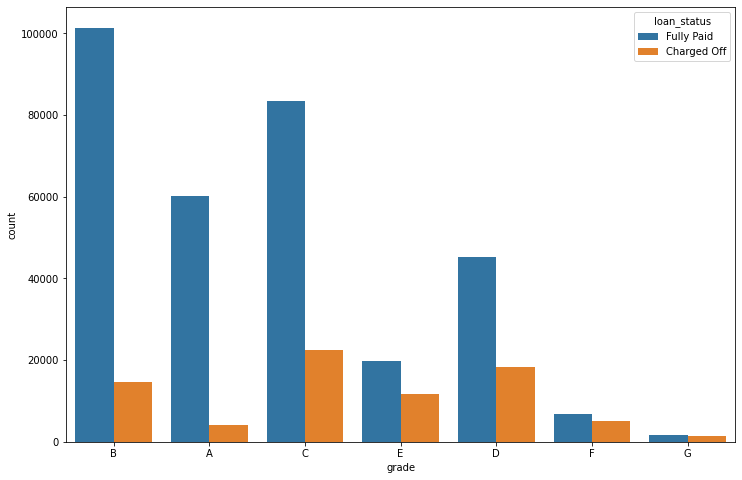

In [221]:
df["grade"].unique() # unique values in "grade" variable
plt.figure(figsize=(12,8))
sns.countplot(x="grade", hue="loan_status", data=df)

This graph shows that as the grde moves from A-C, the default rate may increase. To investigate it further, we must **normalize** this plot as follows:


1.   First, the DataFrame is grouped by grade and loan_status, and the size of each group is computed using the size() method. The **reset_index()** method is then used to convert the resulting Series back into a DataFrame with a count column representing the number of observations in each group.
2.   Next, a new column named percentage is created by applying a **lambda function** to the count column within each grade group. The lambda function divides each value in the count column by the sum of all values in that group, and then multiplies the result by 100 to obtain the percentage.

**hue** is an optional parameter that allows you to specify a categorical column name in the data frame to group the data by and plot the counts for each group side-by-side. Here, this creates separate bars for each loan status within each grade.

**Lambda functions** are often used as a quick and convenient way to define functions that are only used once. 

<Axes: xlabel='grade', ylabel='percentage'>

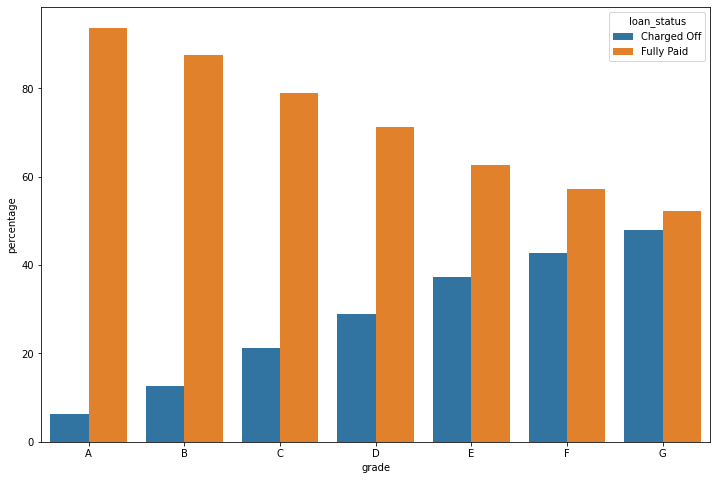

In [222]:
# Calculate the percentage of each loan_status within each grade
normalized_df = df.groupby(["grade", "loan_status"]).size().reset_index(name="count")
normalized_df["percentage"] = normalized_df.groupby("grade")["count"].apply(lambda x: (x / x.sum()) * 100)

# Plot the percentage using a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x="grade", y="percentage", hue="loan_status", data=normalized_df)

Obviously, there is a very strong relationship between the unpaid loan status and grade; i.e., as grade shifts from A-G, the default rate  increases noticeably!

We can quantify this plot's observations by printing the loan_status of each grade:

In [223]:
# Get the unique values of the "grade" column and sort them alphabetically
grades = list(sorted(df["grade"].unique()))

# Iterate through each grade and calculate the percentage of each loan status
for grade in grades:
    # Filter the dataframe by the current grade and group by loan status
    temp_df = df[df["grade"] == grade].groupby("loan_status")["grade"].count()
    # Calculate the percentage of each loan status
    percentage = temp_df * 100 / len(df[df["grade"] == grade])
    # Print the percentage of each loan status for the current grade
    print(f"{grade}%:\n{percentage}")


A%:
loan_status
Charged Off     6.287878
Fully Paid     93.712122
Name: grade, dtype: float64
B%:
loan_status
Charged Off    12.573049
Fully Paid     87.426951
Name: grade, dtype: float64
C%:
loan_status
Charged Off    21.1809
Fully Paid     78.8191
Name: grade, dtype: float64
D%:
loan_status
Charged Off    28.867829
Fully Paid     71.132171
Name: grade, dtype: float64
E%:
loan_status
Charged Off    37.36344
Fully Paid     62.63656
Name: grade, dtype: float64
F%:
loan_status
Charged Off    42.787971
Fully Paid     57.212029
Name: grade, dtype: float64
G%:
loan_status
Charged Off    47.8389
Fully Paid     52.1611
Name: grade, dtype: float64


## 1.6 Target varaible (loan_status, categorical) vs. sub_grade (categorical variable)

<Axes: xlabel='sub_grade', ylabel='count'>

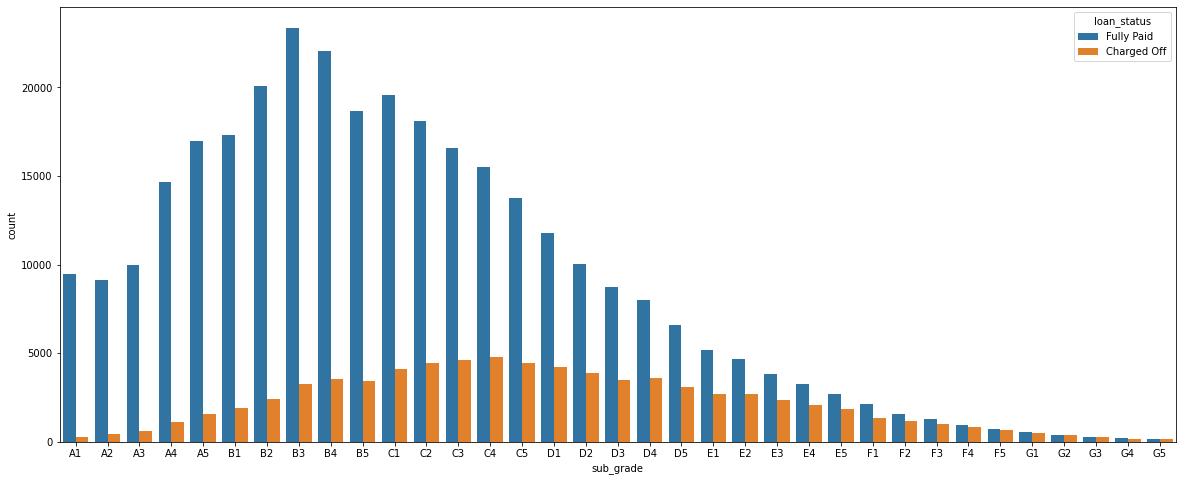

In [224]:
# Create a list of subgrades in alphabetical order
sub_grades = list(sorted(df["sub_grade"].unique()))

plt.figure(figsize=(20,8))
# Create a count plot of subgrades with loan status as hue
# Use the order parameter to specify the order of subgrades
sns.countplot(x="sub_grade", hue="loan_status", order=sub_grades, data=df)

<Axes: xlabel='sub_grade', ylabel='percentage'>

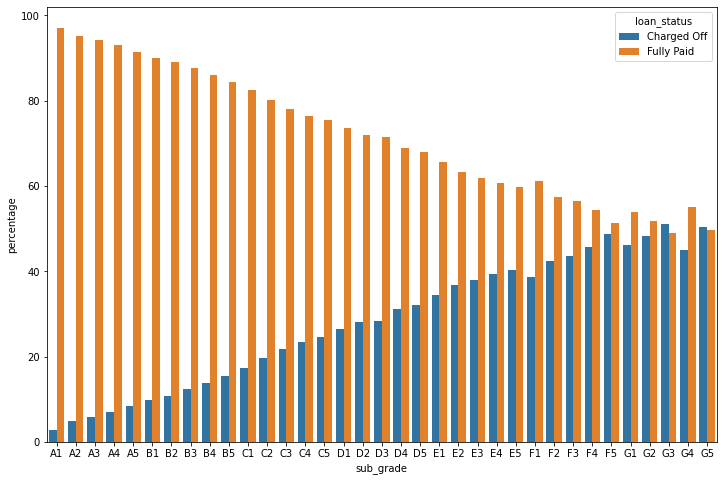

In [225]:
# Calculate the percentage of each loan_status within each sub_grade
normalized_df_2 = df.groupby(["sub_grade", "loan_status"]).size().reset_index(name="count")
normalized_df_2["percentage"] = normalized_df_2.groupby("sub_grade")["count"].apply(lambda x: (x / x.sum()) * 100)

# Plot the percentage using a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x="sub_grade", y="percentage", hue="loan_status", data=normalized_df_2)

Except sub_groups D3, F1, G1, and G4, in the other 31 sub_groups, the same trend as groups was observed:
As we move from groups A-Z/1-5, the default rate significantly increases!

## 1.7 Target varaible (loan_status, categorical) vs. emp_length (categorical variable)

In [226]:
meta_data["Description"][7]

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

<Axes: xlabel='emp_length', ylabel='percentage'>

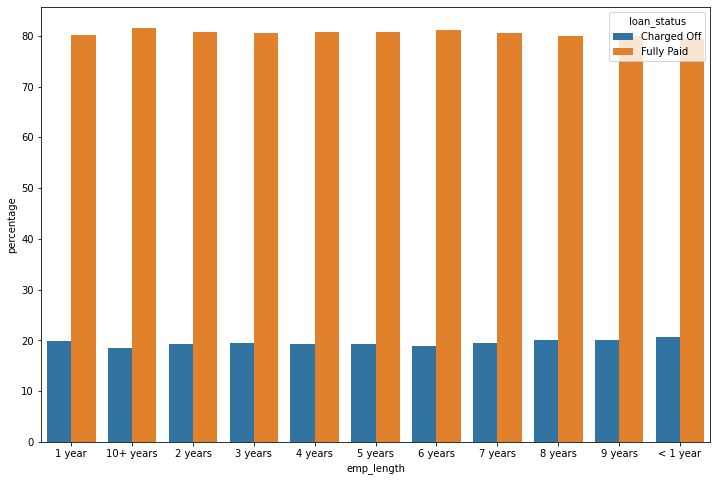

In [227]:
# Calculate the percentage of each loan_status within each emp_length
normalized_df_3 = df.groupby(["emp_length", "loan_status"]).size().reset_index(name="count")
normalized_df_3["percentage"] = normalized_df_3.groupby("emp_length")["count"].apply(lambda x: (x / x.sum()) * 100)

# Plot the percentage using a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x="emp_length", y="percentage", hue="loan_status", data=normalized_df_3)

There is no relationship between emp_length and the default rate!!!

## 1.8 Target varaible (loan_status, categorical) vs. verification_status (categorical variables)

In [228]:
meta_data["Description"][[10,12]]

10    Indicates if income was verified by LC, not ve...
12                           Current status of the loan
Name: Description, dtype: object

<Axes: xlabel='verification_status', ylabel='percentage'>

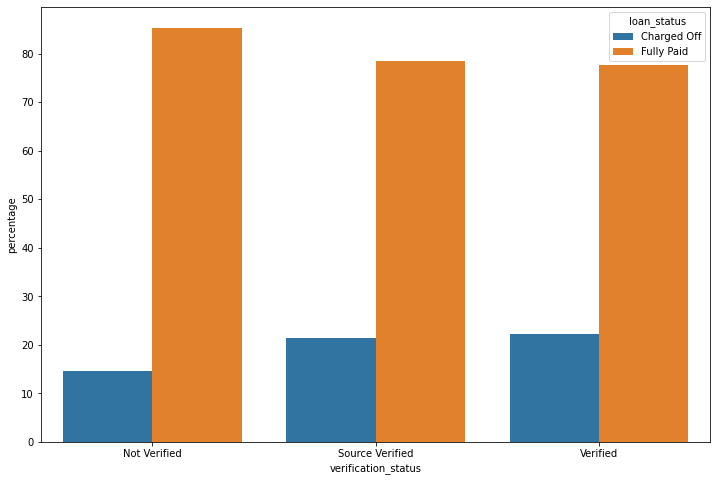

In [229]:
# Calculate the percentage of each loan_status within each verification_status
normalized_df_4 = df.groupby(["verification_status", "loan_status"]).size().reset_index(name="count")
normalized_df_4["percentage"] = normalized_df_4.groupby("verification_status")["count"].apply(lambda x: (x / x.sum()) * 100)

# Plot the percentage using a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x="verification_status", y="percentage", hue="loan_status", data=normalized_df_4)

Based on the data, we observe a slight increase in the default rate as we move from loans where income was not verified to those where income was source verified to those where income was fully verified. This suggests that the bank's income *verification process* is **highly ineffective** !! 
Further investigation is needed to draw a definitive conclusion.

## 1.9 Investigation of Target variable (loan_status, categorical)

In [230]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

We convert this categorical variable to numerical form via **Ordinal Encoding** (based on buisness logic). It will encode "Fully paid" as 1 and "Charged Off" as 0. This approach assumes that "Fully paid" is the positive class and "Charged Off" is the negative class. However, this assumption may not always be correct or applicable. 


*   Use it when there is a meaningful mathematical order in the variable
*   Don't use it when there is no mathematical order; e.g. gender, hair color, name etc.


*   **label encoding** assigns each category a unique integer value, while ordinal encoding assigns values based on the order or rank of the categories.


Then, we look into the correlation between numerical loan_status with other numerical varables.

In [231]:
# Convert "Fully Paid" to 0 and "Charged Off" to 1 in loan_status column using lambda function
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x == "Charged Off" else 0)

In [232]:
# Calculate the correlation coefficients of loan_status with other numerical columns and sort them in ascending order
# and Drop the loan_status row from the correlation coefficients
df.corr()["loan_status"].sort_values().drop("loan_status")

mort_acc               -0.073111
annual_inc             -0.053432
total_acc              -0.017893
revol_bal              -0.010892
pub_rec_bankruptcies    0.009383
pub_rec                 0.019933
open_acc                0.028012
installment             0.041082
loan_amnt               0.059836
dti                     0.062413
revol_util              0.082373
int_rate                0.247758
Name: loan_status, dtype: float64

<Axes: >

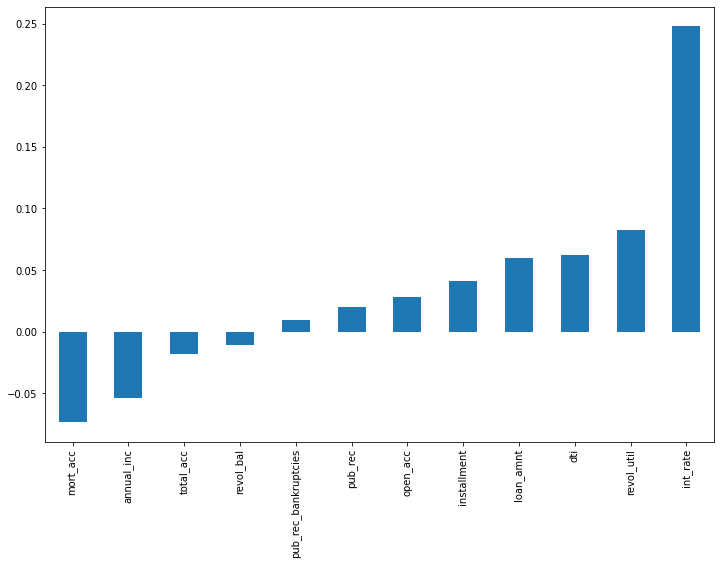

In [233]:
# Plot the correlation coefficients using a bar plot
plt.figure(figsize=(12,8))
df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

<Axes: >

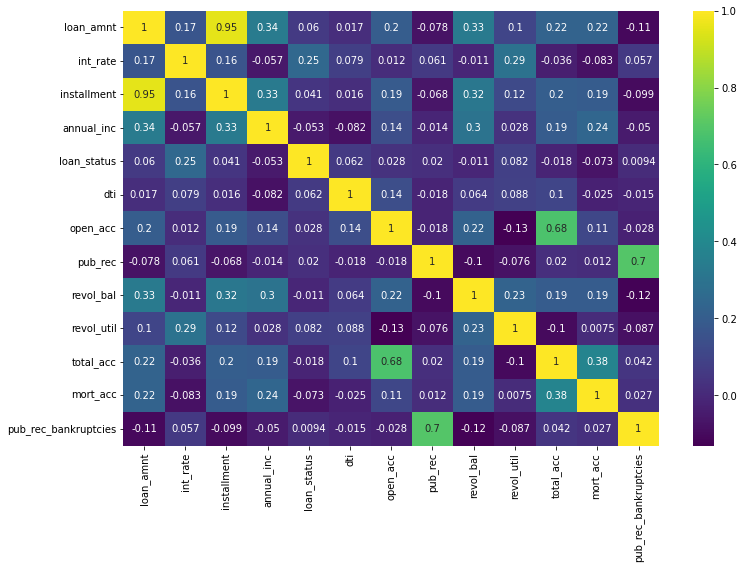

In [234]:
# Heatmap of Correlation Matrix after manual label encoding of loan_status
plt.figure(figsize= (12, 8)) # define the figure size
sns.heatmap(df.corr(), annot=True, cmap="viridis")

We see that the loan_status has a noticeable negative correlation (-0.25) with int_rate, and a weak positive (0.07) with mort_acc.



1.   int_rate: Interest Rate on the loan
2.   mort_acc: Number of mortgage accounts.


 

<Axes: xlabel='mort_acc', ylabel='loan_status'>

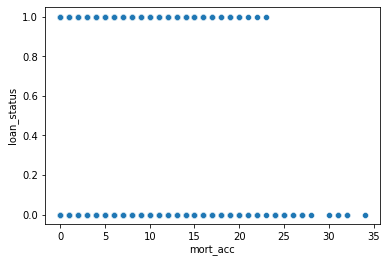

In [235]:
sns.scatterplot(x="mort_acc", y="loan_status", data=df)

It shows that Everyone holding 25 or more mortgage accounts Fully Paid back their loans!

<Axes: xlabel='int_rate', ylabel='loan_status'>

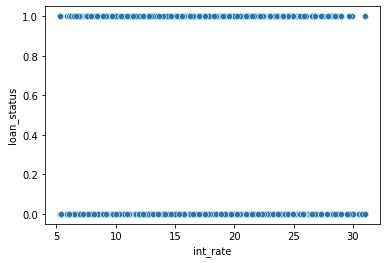

In [236]:
sns.scatterplot(x="int_rate", y="loan_status", data=df)

It shows that most of people whose interest rates was higher than 30% Fully Paid back their loans. Not a strong observation though!

# **2. Data Cleaning**

## **2.1 Missing Values**



1.   Check for missing values of DataFrame
2.   Drom columns with more than 90% missing values
3.   Investigate columns containing missing values one-by-one



In [237]:
# Calculate the percentage of missing values in each column
df.isnull().sum()*(100/len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

### 2.1.2 emp_title

In [238]:
df["emp_title"].unique()
df["emp_title"].nunique()

173105

This column has "**curse of dimensionality**" problem meaning during encoding (one-hot encoding etc.) it will result into > 137k new columns or numerical values. Hence, this variable is useless and must be dropped. 

In [239]:
df.drop("emp_title", axis=1, inplace=True)

### 2.1.3 emp_length

In [240]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [241]:
# drop emp_length as it in not an important variable
df.drop("emp_length", axis=1, inplace=True)

### 2.1.4 title & revol_util

In [242]:
df["title"].unique()
df["title"].nunique()

48817

In [243]:
# drop title varaibale due to curse of dimensionality
df.drop("title", axis=1, inplace=True)

In [244]:
df["revol_util"].nunique()

1226

In [245]:
# drop title varaibale due to curse of dimensionality
df.drop("revol_util", axis=1, inplace=True)

### 2.1.5 mort_acc

In [246]:
df["mort_acc"].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

As seen in [26] (section 1.9), this variable contains some usefull information. Hence, to deal with its missing values, we look inti the distribution of the data. If the data is *normally distributed*, using **mean** to fill in missing values is a good choice. On the other hand, if the data is *skewed or contains outliers*, using **median** to fill in missing values may be more appropriate. 

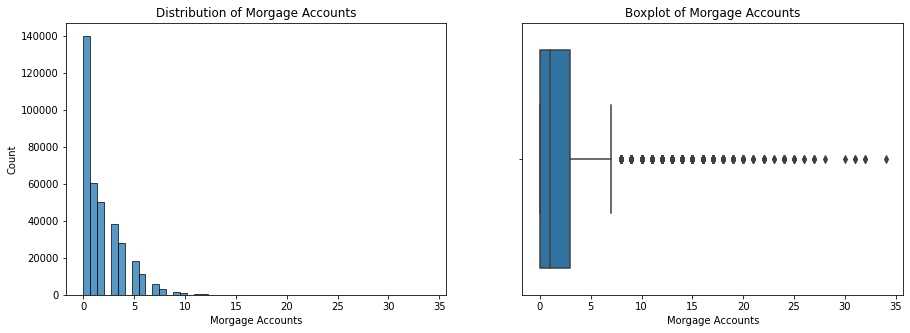

In [247]:
# check the distribution of loan_amnt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram on the first subplot
sns.histplot(df["mort_acc"], bins=50, ax=axes[0])
axes[0].set_xlabel("Morgage Accounts")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Morgage Accounts")

# Plot boxplot on the second subplot
sns.boxplot(x=df["mort_acc"], ax=axes[1])
axes[1].set_xlabel("Morgage Accounts")
axes[1].set_title("Boxplot of Morgage Accounts")

plt.show()

So, we based on this observation we use **median** to fill in missing values in mort_acc

In [248]:
# Replace missing values in 'mort_acc' column with median of the column
median_ma = df["mort_acc"].median()
df["mort_acc"].fillna(median_ma, inplace=True)

### 2.1.6 pub_rec_bankruptcies

In [249]:
df["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

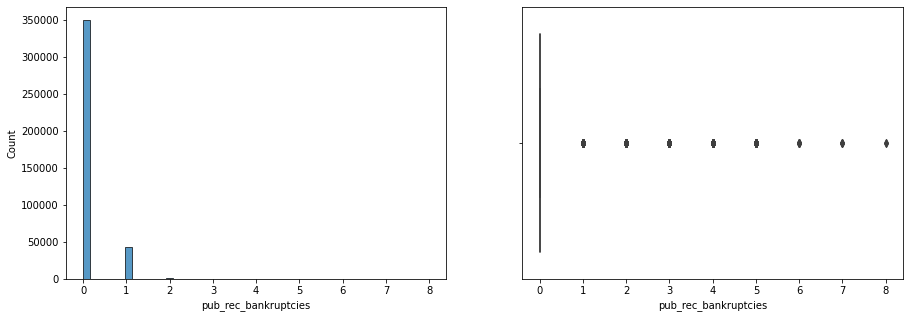

In [250]:
# check the distribution of pub_rec_bankruptcies

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram on the first subplot
sns.histplot(df["pub_rec_bankruptcies"], bins=50, ax=axes[0])

# Plot boxplot on the second subplot
sns.boxplot(x=df["pub_rec_bankruptcies"], ax=axes[1])

plt.show()

So, we based on this observation we use **median** to fill in missing values in median_prb

In [251]:
# Replace missing values in 'mort_acc' column with median of the column 
median_prb = df["pub_rec_bankruptcies"].median()
df["pub_rec_bankruptcies"].fillna(median_prb, inplace=True)

### 2.1.7 Sanity Check
Now, we should perform a sanity check on the data frame to confirm whether all missing values have been appropriately handled.

In [252]:
df.isnull().sum()*(100/len(df))

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

# **3.** **Feature Engineering**

Feature Engineering is the process of selecting, creating, and transforming variables or features from raw data to improve the performance of machine learning models. It involves analyzing the data, identifying relevant features, and transforming them into a format suitable for analysis.

## 3.1 Listing all Categorical Variables

In [253]:
# Show columns with data type "object"
df.select_dtypes("object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

## 3.2 'term'

In [254]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

We should extract the numerical part and dispose the alphabetical part using **lambda function** to each element in the "term" column to extract the *first three* characters, which represent the numerical part of the term (first 3 characters inc. 1 initial spcae), and then converts it to an integer.

In [255]:
# extract the numerical part of the "term" column and convert it to an integer
df["term"]=df["term"].apply(lambda x: int(x[:3]))

## 3.3 grade & sub_grade
As our data analyses in Sections 1.5 and 1.6 showed, both these variable show similar trend, yet for simplicity, we keep grade and drop subgrade as it contains many more values:

In [256]:
df.drop("sub_grade", axis=1, inplace=True)

## 3.4 home_ownership

In [257]:
df["home_ownership"].unique()
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

Since NONE and ANY are few, and they do not make much sense as compared to OTHER, we will combine these three values.

In [258]:
# Using pd's replace method
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [259]:
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

## 3.5 address

In [260]:
df["address"].unique()

array(['0174 Michelle Gateway\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\nNew Michael, FL 29597',
       '787 Michelle Causeway\nBriannaton, AR 48052'], dtype=object)

It is a combination of alphnumeric and spatial characters. But, the last five digits (postcode) could be useful for our analysis. Thus, we extract those digits, inser them in "zip" varaible, and drop the "address":

In [261]:
df["zip"] = df["address"].apply(lambda x: int(x[-5:]))

In [262]:
df.drop("address", axis=1, inplace=True)

## 3.6 earliest_cr_line

In [263]:
df["earliest_cr_line"]

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

We extract the year from this:

In [264]:
df["earliest_cr_line"] = df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

## 3.7 pub_rec
it is a numerical variable. 0 is no criminal record (good).

In [265]:
df["pub_rec"].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

We convert it to a binary (0 and 1) numerical variable meaning that no pub_rec = 0, any number of pub_rec = 1:

In [266]:
df["pub_rec"].apply(lambda x: 0 if x==0 else 1).value_counts()

0    338272
1     57758
Name: pub_rec, dtype: int64

In [267]:
# Convert pub_rec column to binary (0 or 1)
df["pub_rec"] = df["pub_rec"].apply(lambda x: 0 if x==0 else 1)

## **3.8** **Ordinal encoding: convert the remaining categorical variables into numerical variables**

In [268]:
    # Method 1
cols = df.select_dtypes("object").columns
def oridinal_mapper (data, var):
  ordinal_map = {k:i for i,k in enumerate(data[var].unique(),start = 0)}
  data[var] = data[var].map(ordinal_map)

for var in cols:
  ordinal_mapper(df, var)

1.	The ordinal_mapper function takes two arguments: data which is a dataframe, and var which is a string representing the name of a categorical variable.
2.	Within ordinal_mapper, a dictionary ordinal_map is created with the unique values of data[var] as the keys, and the corresponding integer values **starting from 0** as the values.
Overall, this code is applying an ordinal encoding technique to convert categorical variables in a dataframe to numerical ones by mapping each unique category to a unique integer value. However, it's important to note that not all categorical variables have an inherent order, and in such cases, ordinal encoding may not be appropriate.

**Risk**: In some machine learning algorithms, assigning **0** to a category can cause issues because the algorithm may treat the 0 as if it has a lower value or is less important than other categories or is null. By starting the encoding from 1, we ensure that there are no confounding issues caused by the presence of the value 0 in the encoded categorical variable. This can become very important specifically in *neural networks*!

In [269]:
#     # Method 2
# # Select all columns with object data type
# cols = df.select_dtypes("object").columns

# # Define a function to map each unique value to a numerical value
# def ordinal_mapper (data, var):
#   ordinal_map = {k:i for i,k in enumerate(data[var].unique(),start = 1)}
#   data[var] = data[var].map(ordinal_map)

# # Apply the ordinal_mapper function to all object columns in the dataframe
# for var in cols:
#   ordinal_mapper(df, var)

Here, the ordinal_mapper function takes a dataframe and a variable and creates a dictionary mapping each unique value to a numerical value using enumerate. The second argument to enumerate is set to 1 to start the numbering at **1 instead of 0**.

If we omit the start parameter in the enumerate function as in the given code, it will start enumerating from 0 by default. So, the ordinal mapping will start from 0 instead of 1 in the resulting ordinal_map dictionary. 

You can replace the ordinal_mapper function with ***LabelEncoder*** from **scikit-learn** to perform label encoding:

In [270]:
    # Mthod 3 - Label Encoding
# from sklearn.preprocessing import LabelEncoder

# # Select all columns with object data type
# cols = df.select_dtypes("object").columns

# # Apply LabelEncoder to all object columns in the dataframe
# for var in cols:
#     le = LabelEncoder()
#     df[var] = le.fit_transform(df[var].astype(str)) + 1  # Add 1 to start from 1 instead of 0

In [271]:
df[cols].head()

,grade,home_ownership,verification_status,issue_d,purpose,initial_list_status,application_type
0,1,1,1,1,1,1,1
1,1,2,1,1,2,2,1
2,1,1,2,1,3,2,1
3,2,1,1,2,3,2,1
4,3,2,3,3,3,2,1


# **4.** **Modelling**

## 4.1 Splitting Dataset (train, test)

In [272]:
from sklearn.model_selection import train_test_split

# explinatory variable (i.e., everything except the target varaible)
X = df.drop("loan_status", axis=1)
# target variable
y = df["loan_status"]

# split the data into training and testing sets using train_test_split function
# test_size=0.33 indicates that we want to reserve 33% of the data for testing
# random_state=42 is a seed value to ensure reproducibility of the random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2 Scaling the Dataset
MinMaxScaler is a scaler class in scikit-learn that scales the input data to a specified range (usually [0, 1]). It performs the scaling by subtracting the minimum value of the feature and then dividing by the range (i.e., the difference between the maximum and minimum values) of the feature.
The MinMaxScaler is useful for **scaling features to a fixed range** and can be helpful for algorithms that rely on distance calculations, such as K-Nearest Neighbors (**KNN**) or Support Vector Machines (**SVM**).


In [273]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler object
scaler = MinMaxScaler()

# Scale the training data using the fit_transform() method
X_train = scaler.fit_transform(X_train)

# Scale the testing data using the transform() method to avoid data leakage
X_test = scaler.transform(X_test)

•	fit_transform() is used to fit the scaler to the training set and transform it. This means that the scaler is "fitted" to the data in the training set and then used to transform it, so that the features are scaled appropriately. The transformed data is then saved to X_train.

•	transform() is used to transform the test set. **Note** that we only transform the test set, not fit it, since we want to use the **same scaling** that was learned from the training set.


## **4.3** **TensorFlow (Deep Learning)**

In [274]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import logging
from tensorflow.keras.callbacks import EarlyStopping

In [275]:
# Create a sequential model object
model = Sequential()

# Add a dense layer with 78 output neurons with a ReLU activation function
model.add(Dense(78, activation='relu'))
# Add a dropout layer to prevent overfitting (20% of neurons will be switched off in each epoch )
model.add(Dropout(0.2))
# Add another dense layer with 19 output neurons, with a ReLU activation function
model.add(Dense(39, activation='relu'))
# Add another dropout layer to prevent overfitting (20% of neurons will be switched off in each epoch )
model.add(Dropout(0.2))
# Add another dense layer with 19 output neurons, with a ReLU activation function
model.add(Dense(19, activation='relu'))
# Add another dropout layer to prevent overfitting (20% of neurons will be switched off in each epoch )
model.add(Dropout(0.2))
# Add another dense layer with 19 output neurons, with a ReLU activation function
model.add(Dense(19, activation='relu'))
# Add another dropout layer to prevent overfitting (20% of neurons will be switched off in each epoch )
model.add(Dropout(0.2))

# Add the output layer with 1 neuron and a sigmoid activation function, since it's a binary classification problem
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss function, Adam optimizer and accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

**monitor='val_loss'** is a parameter of EarlyStopping function in Keras that specifies the quantity to be monitored for early stopping. In this case, val_loss is used, which stands for the validation loss. It means the EarlyStopping function monitors the validation loss during training, and it stops the training process when the validation loss does not improve for a certain number of epochs specified by the patience parameter.

**verbose=1** means that during training, Keras will print a message for each epoch to show the progress of the training. Specifically, it will print the epoch number, the training loss, and any validation metrics being tracked (if applicable).

**patience=5** sets the number of epochs to wait before stopping the training if there is no improvement in the validation loss. In other words, if the validation loss does not improve after 25 epochs, the training will be stopped early. This is done to prevent overfitting of the model on the training data. If the patience value is too small, the training may stop too early and the model may not reach its optimal performance. If it is too large, the model may overfit to the training data. The value of patience can be adjusted based on the specific dataset and model being used.


In [276]:
# running the model
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
1238/1238 [==============================] - 9s 7ms/step - loss: 0.4124 - accuracy: 0.8357 - val_loss: 0.3629 - val_accuracy: 0.8592
Epoch 2/25
1238/1238 [==============================] - 6s 5ms/step - loss: 0.3540 - accuracy: 0.8586 - val_loss: 0.3286 - val_accuracy: 0.8596
Epoch 3/25
1238/1238 [==============================] - 8s 7ms/step - loss: 0.3395 - accuracy: 0.8595 - val_loss: 0.3189 - val_accuracy: 0.8596
Epoch 4/25
1238/1238 [==============================] - 7s 6ms/step - loss: 0.3102 - accuracy: 0.8752 - val_loss: 0.2857 - val_accuracy: 0.8877
Epoch 5/25
1238/1238 [==============================] - 8s 6ms/step - loss: 0.2914 - accuracy: 0.8852 - val_loss: 0.2821 - val_accuracy: 0.8878
Epoch 6/25
1238/1238 [==============================] - 6s 5ms/step - loss: 0.2868 - accuracy: 0.8867 - val_loss: 0.2803 - val_accuracy: 0.8877
Epoch 7/25
1238/1238 [==============================] - 9s 7ms/step - loss: 0.2855 - accuracy: 0.8866 - val_loss: 0.2795 - val_accuracy:

This code trains the model on the training data (X_train and y_train) with 25 epochs and a batch size of 256. The model's performance on unseen data is monitored using the **validation data (X_test and y_test)**. The **early_stop** callback is used to prevent overfitting by stopping the training process when the **validation loss** does not improve after 25 epochs.

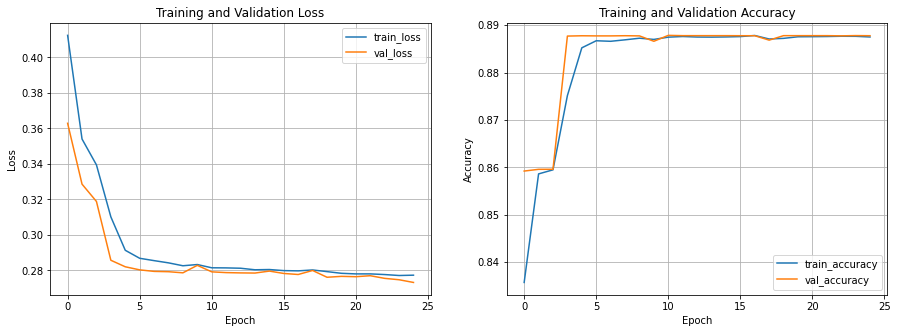

In [277]:
# plotting the loss and accuracy
history = model.history.history
loss = pd.DataFrame(history['loss'])
val_loss = pd.DataFrame(history['val_loss'])
acc = pd.DataFrame(history['accuracy'])
val_acc = pd.DataFrame(history['val_accuracy'])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# plot loss
ax1.plot(loss, label='train_loss')
ax1.plot(val_loss, label='val_loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# plot accuracy
ax2.plot(acc, label='train_accuracy')
ax2.plot(val_acc, label='val_accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)


plt.show()


**"loss"** refers to the* error between the predicted output* of the model and the ***true output***. This error is calculated during each iteration of the training process, and the goal of training is to minimize this error.

**"Val_loss"** or "validation loss" refers to the *error or loss* calculated on a separate validation dataset, which is distinct from the training data. This validation dataset is used to evaluate the model's performance on ***unseen/test data***, and to prevent overfitting during training. By monitoring both the training loss and validation loss, we can check whether the model is overfitting, and adjust the model's architecture or parameters accordingly to improve its performance.


### **4.3.1** **Classification Report**
A classification report is a comprehensive summary of performance metrics for a classification model. It is a tabular representation that provides insight into the effectiveness of the model by displaying various evaluation metrics for each class label. The classification report is generated by comparing the true class labels with the predicted class labels obtained from the model.

In [279]:
# Make predictions using the trained model
y_pred_probs = model.predict(X_test)

# Convert the predicted probabilities into class labels (threshold at 0.5 for binary classification)
y_pred = (y_pred_probs > 0.5).astype('int32')

# Print the classification report
print(classification_report(y_test, y_pred))

2476/2476 [==============================] - 13s 5ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     63629
           1       1.00      0.43      0.60     15577

    accuracy                           0.89     79206
   macro avg       0.94      0.71      0.77     79206
weighted avg       0.90      0.89      0.87     79206



The metrics are calculated separately for each class (0 and 1) and are also summarized as an overall accuracy. Here's an interpretation of the results:
1.	Class 0 (Negative class):
•	**Precision**: 0.88 indicates that, out of all the instances predicted as class 0, 88% were actually class 0.
•	**Recall**: 1.00 indicates that, out of all the true class 0 instances, the model correctly identified 100% of them.
•	**F1-score**: 0.93 is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall. A higher F1-score (closer to 1) indicates better performance.
2.	Class 1 (Positive class):
•	Precision: 1.00 indicates that, out of all the instances predicted as class 1, 100% were actually class 1.
•	Recall: 0.43 indicates that, out of all the true class 1 instances, the model correctly identified only 43% of them.
•	F1-score: 0.60 is the harmonic mean of precision and recall for class 1. In this case, the F1-score is lower than class 0, indicating that the model's performance on the positive class is not as good as on the negative class.
3.	***Accuracy: 0.89*** is the overall accuracy of the model, indicating that the model correctly classified 89% of the instances in the test dataset.
The results show that the model performs very well on class 0 but struggles with class 1, especially in terms of recall. This might be due to class imbalance or other factors affecting the model's ability to generalize well on the positive class. To improve the model's performance on the positive class, you can consider using resampling techniques, adjusting the model architecture, or applying other strategies.

## **4.4** **Machine Learning (Classification)**  

In [289]:
# Import the necessary classifiers from scikit-learn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

algo = [
    # Linear Support Vector Classifier
    LinearSVC(),
    # Logistic Regression with specified random state, solver, and maximum number of iterations
    LogisticRegression(random_state=0, solver="lbfgs", max_iter=1000),
    # Gaussian Naive Bayes Classifier
    GaussianNB(),
    # Random Forest Classifier with specified random state and number of estimators (trees)
    RandomForestClassifier(random_state=0, n_estimators=10),
    # Multi-layer Perceptron (MLP) Classifier with default settings (Takes too long!!!)
    #MLPClassifier()
]


In [284]:
# Import the necessary module for calculating classification report
from sklearn.metrics import classification_report

# Define a function 'model_clf' that takes a classifier 'x' as input
def model_clf(x):
    # Initialize the classifier with the input 'x'
    clf = x
    # Print the model name
    print(f"Model: {clf.__class__.__name__}\n")
    # Fit the classifier to the training data (X_train, y_train)
    clf.fit(X_train, y_train)
    # Make predictions on the test data (X_test) using the fitted classifier
    predict = clf.predict(X_test)
    # Print the classification report by comparing the true test labels (y_test) with the predicted labels (predict)
    print(classification_report(y_test, predict))

In [290]:
# Iterate over the classifiers in the list 'algo'
for alg in algo:
    # Call the 'model_clf' function with the current classifier 'alg' as input
    # This will fit the classifier to the training data, make predictions on the test data,
    # and print a classification report for each classifier
    model_clf(alg)

Model: LinearSVC

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     63629
           1       0.75      0.24      0.37     15577

    accuracy                           0.84     79206
   macro avg       0.79      0.61      0.64     79206
weighted avg       0.82      0.84      0.80     79206

Model: LogisticRegression

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     63629
           1       0.69      0.29      0.41     15577

    accuracy                           0.84     79206
   macro avg       0.77      0.63      0.66     79206
weighted avg       0.82      0.84      0.81     79206

Model: GaussianNB

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     63629
           1       0.57      0.30      0.40     15577

    accuracy                           0.82     79206
   macro avg       0.71      0.62      0.64     79206
weighted a

In this comparison, we observe that the **RandomForestClassifier** achieves an accuracy almost as high as that of the neural network (89%), while utilizing significantly fewer resources. This demonstrates that RandomForestClassifier can be an efficient alternative for certain tasks, providing comparable performance with less computational complexity!

* Furthermore, neural networks are often considered "**black boxes**" due to their complexity and the difficulty in interpreting their inner workings. This can make it challenging to explain their predictions from a business perspective. In contrast, simpler models like RandomForestClassifier may offer more interpretability, allowing for easier understanding and communication of their decision-making processes.